# DH-Parametertabelle youBot

$\begin{array}{rr} \hline
\mathbf{Gelenk} &\mathbf{\theta} &\mathbf{d} &\mathbf{a} &\mathbf{\alpha} \\ \hline
\mathbf{1} &0        &0.075 &0.033 &-\pi / 2 \\ \hline
\mathbf{2} &-\pi / 2 &0     &0.155 &0 \\ \hline
\mathbf{3} &0        &0     &0.135 &0 \\ \hline
\mathbf{4} &\pi / 2  &0     &0     &\pi / 2 \\ \hline
\mathbf{5} &\pi / 2  &0.218 &0     &0 \\ \hline
\end{array}$

DH Parameter

In [1]:
import numpy as np

dh_theta_values = np.array([0, -np.pi / 2, 0, np.pi / 2, np.pi / 2])
dh_alpha_values = np.array([-np.pi / 2, 0, 0, np.pi / 2, 0])
dh_a_values = np.array([0.033, 0.155, 0.135, 0, 0])
dh_d_values = np.array([0.075, 0, 0, 0, 0.218])

Wir programmieren nun eine Python-Funktion <b>dhIthFrame</b> zur Erstellung eines einzelnen DH-Frames. Dabei übergeben wir noch keine Parameter, sondern bleiben gänzlich auf symbolischer Ebene mit $\theta$, $d$, $a$ und $\alpha$.

In [2]:
def dhIthFrame(theta, d, a, alpha):
    
    rot_theta = np.matrix([ [np.cos(theta), -np.sin(theta), 0, 0], 
                            [np.sin(theta), np.cos(theta), 0, 0], [0, 0, 1, 0], 
                            [0, 0, 0, 1] ])
    
    trans_d = np.matrix([ [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, d], [0, 0, 0, 1] ])
    trans_a = np.matrix([ [1, 0, 0, a], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1] ])
    
    rot_alpha = np.matrix([ [1, 0, 0, 0], 
                            [0, np.cos(alpha), -np.sin(alpha), 0], 
                            [0, np.sin(alpha), np.cos(alpha), 0], [0, 0, 0, 1] ])
    
    dh_ith_frame = rot_theta * trans_d * trans_a * rot_alpha
    
    return dh_ith_frame;

Dieses DH-Frame ist unsere Blaupause für die Forwärtstransformation am youBot. Wir definieren eine Python-Funktion <b>buildDhTcpFrame</b>, in welcher wir die Argumente eines solchen Blaupause-Frames durch die DH-Parameter und den Symbolen für die Gelenkwinkel $q_{1}$ bis $q_{5}$ iterativ substituieren und die resultierenden Frames zu einem Ergebnis-Frame akkumulieren. Anschließend vereinfachen wir noch das Ergebnis mit <b>trigsimp</b>.

In [3]:
def buildDhTcpFrame(q_array):
    dh_frame = np.identity(4)
      
    for i in range(5):
        tmp_dh_ith = dhIthFrame(q_array[i] + dh_theta_values[i], 
                                dh_d_values[i], 
                                dh_a_values[i], 
                                dh_alpha_values[i])
        dh_frame = np.matmul(dh_frame, tmp_dh_ith)
    
    return dh_frame

In [4]:
# def normalize(data):
#     dmax = np.radians(165)
#     dmin = np.radians(-168)

#     for i, arr in enumerate(data):
#         for j, value in enumerate(arr):
#             data[i][j] = (2 * (value - dmin) / (dmax - dmin)) - 1

In [5]:
# def denormalize(data):
#     dmax = np.radians(165)
#     dmin = np.radians(-168)
    
#     for i, arr in enumerate(data):
#         for j, value in enumerate(arr):
#             data[i][j] = (((value + 1) * (dmax - dmin)) / 2) + dmin

In [6]:
import utils as u

datahandler = u.DataHandler()

Using TensorFlow backend.


Kuka YouBot Gelenkwinkelgrenzenin Grad [+/-]

Generiere eine Anzahl von zufälligen Gelenkwinkelpositionen und dazugehöriges TCP Frame

In [7]:
import time
import numpy as np

start = time.time()

joint_pos, tcp_pos = datahandler.generate_data(100)
# max_tcp = np.amax(np.absolute(tcp_positions))
# tcp_positions = tcp_positions / max_tcp
end = time.time()
print(end - start)

0.14301228523254395


In [8]:
print("TCP Shape:", tcp_pos.shape)
print("Joint Shape:", joint_pos.shape)

TCP Shape: (100, 12)
Joint Shape: (100, 5)


<IPython.core.display.Javascript object>


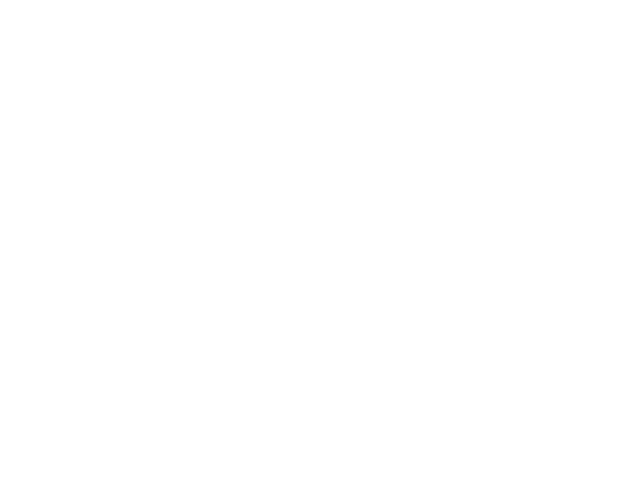

In [9]:
from mpl_toolkits import mplot3d
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from pytransform3d.rotations import *
%matplotlib notebook

tcp = tcp_pos

ax = plot_basis(R=np.eye(3), ax_s=5)
f = 5
samples = np.random.randint(0, len(tcp), 5)
for i in samples:
    point = np.asarray([tcp[i][3] *f, tcp[i][7] *f, tcp[i][11] *f])
    rot = np.asarray([[tcp[i][0], tcp[i][1], tcp[i][2]],
                      [tcp[i][4], tcp[i][5], tcp[i][6]],
                      [tcp[i][8], tcp[i][9], tcp[i][10]]])
    plot_basis(ax, R=rot, p=point)

plt.show()


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization

model = Sequential()
    
# layer = Dense(units=100, 
#           input_dim=12,
#           kernel_initializer='random_normal',
#           use_bias=True,
#           bias_initializer='random_normal',
#           activation='tanh')
layer = Dense(units=500, 
          input_dim=12,
          kernel_initializer='random_normal',
          use_bias=False)

model.add(layer)
model.add(BatchNormalization())
model.add(Activation('tanh'))

dropout = Dropout(0.5)
model.add(dropout)

hidden_layers = 2

for i in range(hidden_layers):
#     layer = Dense(units=100, 
#                   kernel_initializer='random_normal',
#                   use_bias=True,
#                   bias_initializer='random_normal',
#                   activation='tanh')
    layer = Dense(units=500, 
                  kernel_initializer='random_normal',
                  use_bias=False)
    model.add(layer)
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    if i is not (hidden_layers - 1):
        dropout = Dropout(0.5)
        model.add(dropout)
    
# layer = Dense(units=5, 
#               kernel_initializer='random_normal',
#               use_bias=True,
#               bias_initializer='random_normal',
#               activation='tanh')
layer = Dense(units=5, 
              kernel_initializer='random_normal',
              use_bias=False,
              activation='tanh')
model.add(layer)

In [164]:
import keras.backend as K

dh_theta_values = np.array([0, -np.pi / 2, 0, np.pi / 2, np.pi / 2])
dh_alpha_values = np.array([-np.pi / 2, 0, 0, np.pi / 2, 0])
dh_a_values = np.array([0.033, 0.155, 0.135, 0, 0])
dh_d_values = np.array([0.075, 0, 0, 0, 0.218])

def kdhIthFrame(theta, d, a, alpha):
    
    rot_theta = np.array([ [K.cos(theta), -K.sin(theta), 0, 0], 
                           [K.sin(theta), K.cos(theta), 0, 0], 
                           [0, 0, 1, 0], 
                           [0, 0, 0, 1] ])
    
    trans_d = np.array([ [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, d], [0, 0, 0, 1] ])
    trans_a = np.array([ [1, 0, 0, a], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1] ])
    
    rot_alpha = np.array([ [1, 0, 0, 0], 
                            [0, K.cos(alpha), -K.sin(alpha), 0], 
                            [0, K.sin(alpha), K.cos(alpha), 0], [0, 0, 0, 1] ])
    
#     x = K.cast_to_floatx(rot_theta)
#     y = K.cast_to_floatx(trans_d)
    dh_ith_frame = rot_theta * trans_d * trans_a * rot_alpha

#     dh_ith_frame = np.array([[K.cos(theta),1,1,1],[1,1,1,1], [1,1,1,1], [1,1,1,1]])
    
    return dh_ith_frame;


def kbuildDhTcpFrame(q_array):
    dh_frame = np.identity(4)
      
    for i in range(5):
        tmp_dh_ith = kdhIthFrame(q_array[i] + dh_theta_values[i], 
                                dh_d_values[i], 
                                dh_a_values[i], 
                                dh_alpha_values[i])
        dh_frame = np.matmul(dh_frame, tmp_dh_ith)
    
    return dh_frame

In [162]:
import keras.utils as kutil

def custom_loss(y_gt, y_pred):

    tcp_out = kbuildDhTcpFrame(y_pred)
    tcp_out = K.flatten(tcp_out)
    tcp_out = tcp_out[0:, :12]
    tcp_out = np.squeeze(tcp_out)
          
    xyz_gt = y_gt[3::4]
    xyz_pred = tcp_out[3::4]
    angles_gt = np.asarray([y_gt[0:3], y_gt[4:7], y_gt[8:11]]).flatten()
    angles_pred = np.asarray([tcp_out[0:3], tcp_out[4:7], tcp_out[8:11]]).flatten()

    mse = 0
    for i in range(3):
        mse += np.mean((angles_gt[i] - angles_pred[i]) **2)
    mse /= 3
    dist = np.linalg.norm(xyz_gt - xyz_pred)
    
    err = 0.4 * mse + 0.6 * dist

    return err

In [163]:
from keras.optimizers import RMSprop
from keras.optimizers import Adam
# For a mean squared error regression problem
rms = RMSprop(learning_rate=0.01, rho=0.9)
adam=Adam(lr=1.0e-3)

model.compile(optimizer=adam,loss=custom_loss)

IndexError: too many indices for array

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               6000      
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250000    
_________________________________________________________________
batch_normalization_2 (Batch (None, 500)               2000      
_________________________________________________________________
activation_2 (Activation)    (None, 500)              

In [14]:
for i in range(10):
    print("Durchlauf: ",i)
    jpos, tpos = datahandler.generate(1000)
    model.fit(tpos, jpos, epochs=100, batch_size=32, validation_split=0.1)

Durchlauf:  0
Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 2s 2ms/step - loss: 0.4646 - val_loss: 0.2109
Epoch 2/100
900/900 [==============================] - 0s 343us/step - loss: 0.3818 - val_loss: 0.2012
Epoch 3/100
900/900 [==============================] - 0s 343us/step - loss: 0.3227 - val_loss: 0.2055
Epoch 4/100
900/900 [==============================] - 0s 344us/step - loss: 0.3097 - val_loss: 0.2028
Epoch 5/100
900/900 [==============================] - 0s 353us/step - loss: 0.2893 - val_loss: 0.2077
Epoch 6/100
512/900 [================>.............] - ETA: 0s - loss: 0.2720

KeyboardInterrupt: 

In [ ]:
# model.fit_generator(generator = Generator().make(20), 
#                     validation_data  = Generator().make(10),
#                     steps_per_epoch  = 1000, 
#                     epochs           = 200,
#                     validation_steps = 100,
#                     workers = 6,
#                     use_multiprocessing = True)

In [ ]:
# model.save('lo2ng.h5')

In [15]:
model.load_weights('long.h5')

In [16]:
import tensorflow as tf
tf.config.list_physical_devices('GPU') # True/False

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [22]:
%matplotlib notebook
pred_pos, pred_tcp = datahandler.generate(20)
out = model.predict(pred_tcp)
datahandler.denormalize(pred_pos)
# datahandler.denormalize(out)

# for i in range(10):
#     print(pred_pos[i])
#     print(out[i])

In [60]:
# print(custom_loss(pred_tcp[0], pred_pos[0]))
# print(tcper(pred_pos[0]))
# print(pred_tcp[0])
print(custom_loss(pred_tcp[0], pred_pos[0]))

9.56661857488222e-17


In [61]:
err = 0
ranges = 10
for i in range(ranges):
    err += custom_loss(pred_tcp[i], out[i])
err /= ranges
print(err)

0.4436101264374515


<IPython.core.display.Javascript object>


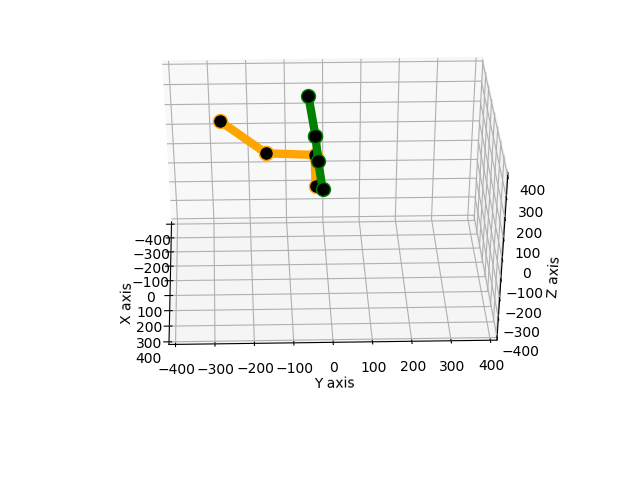

0.18411457401012432


In [62]:
%matplotlib notebook
drawer = u.Drawer()

o = 1
drawer.draw_robot(pred_pos[o], out[o])
print(custom_loss(pred_tcp[o], out[o]))